# Samle Lifetime Grid

This is a follow on to the `SampleLifetimes` notebook. For all our datasets build a histogram that shows how often decays occur in each of the regions. See the previous notebook to understand how cuts for the _calorimeter_ and the _muon spectrometer_ were set for this study.

In [1]:
import sys, os
sys.path.append(os.pardir)

import asyncio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from calms.data import get_ds, as_samples
from calms.mc import analysis_counts

sns.set()

# import logging
# ch = logging.StreamHandler()
# ch.setLevel(logging.DEBUG)
# logging.getLogger('servicex').setLevel(logging.DEBUG)
# logging.getLogger('servicex').addHandler(ch)

Get the datasets we will run over

In [2]:
ds = as_samples(get_ds())

Collect the statistics into a sequence of dictionaries, and place the data back into the dictionary we originally got out. This means all the info is in the same place.

In [3]:
ds = as_samples(get_ds())
r = await asyncio.gather(*[analysis_counts(d['data']) for d in ds])
for d, data in zip(ds, r):
    del d['data']
    d.update(data)

In [4]:
df=pd.DataFrame(ds)
df

,mS,mH,lifetime,campaign,tags,total,has_1muon,has_1cal,has_2muon,has_2cal,has_calms
0,5.0,60.0,5.0,mc16a,signal,159781,13764,35797,287,2169,1505
1,5.0,60.0,5.0,mc16d,signal,189760,16627,41986,334,2708,1877
2,5.0,60.0,5.0,mc16e,signal,249623,21855,55487,478,3452,2359
3,15.0,60.0,5.0,mc16a,signal,79983,5946,16377,120,890,597
4,15.0,60.0,5.0,mc16d,signal,99977,7572,20283,144,1112,745
5,15.0,60.0,5.0,mc16e,signal,119972,9063,24612,157,1385,960
6,5.0,125.0,5.0,mc16a,signal,39976,4386,10379,124,833,631
7,5.0,125.0,5.0,mc16d,signal,49968,5522,12792,167,979,749
8,5.0,125.0,5.0,mc16e,signal,69957,7784,18126,208,1369,1087
9,5.0,125.0,9.0,mc16a,signal,159907,51246,49938,5024,4665,9723


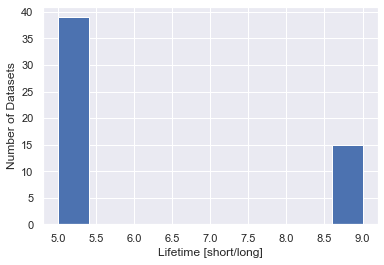

In [5]:
plt.hist(df.lifetime)
_ = plt.xlabel('Lifetime [short/long]')
_ = plt.ylabel('Number of Datasets')

The short lifetime is the one to use for determining our training, and 9 for checking. BTW, 5 and 9 are artifical, they mean long and short.

Next, we need to sum up accross the MC campaigns to see what is "most interesting" when it comes to samples.

In [6]:
records = df[df.lifetime==5].groupby(by=['mS','mH','lifetime']).sum().sort_values('has_calms', ascending=False).to_records()
df_rec = pd.DataFrame(records)
df_rec

,mS,mH,lifetime,total,has_1muon,has_1cal,has_2muon,has_2cal,has_calms
0,275.0,600.0,5.0,999992,156943,286461,7226,24832,26168
1,35.0,125.0,5.0,719997,114357,209998,4818,18495,18703
2,15.0,125.0,5.0,509958,99947,159938,5490,15353,18694
3,275.0,1000.0,5.0,300000,83229,101475,7241,10727,17586
4,50.0,1000.0,5.0,300000,84412,100047,7517,10325,17188
5,50.0,600.0,5.0,300000,76701,99418,5967,10327,15563
6,150.0,600.0,5.0,300000,74993,100231,5910,10381,15320
7,100.0,400.0,5.0,200000,43948,64840,2844,6590,8563
8,5.0,60.0,5.0,599164,52246,133270,1099,8329,5741
9,50.0,200.0,5.0,200000,31803,57795,1477,5115,5355


## Some Plots of where the events are

Just to see where we are dealing with the most events for the common analyses we are looking at.

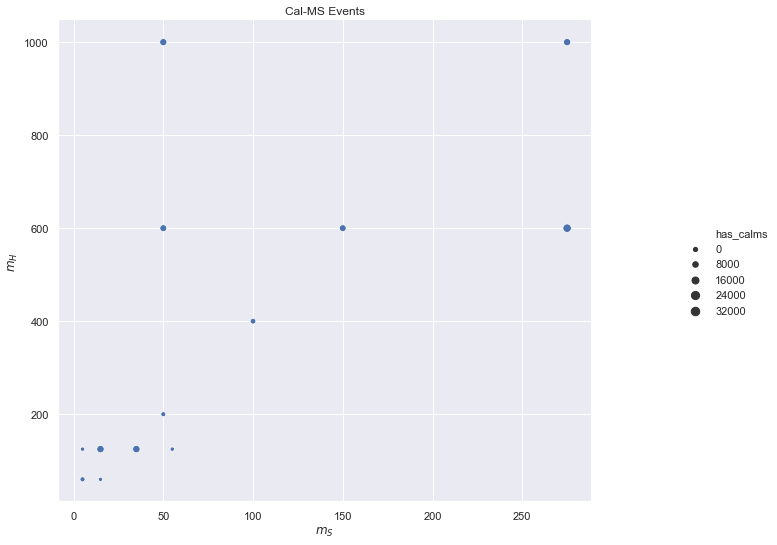

In [7]:
sns.relplot(x="mS", y="mH",
            size="has_calms",
            data=df_rec)
plt.title('Cal-MS Events')
plt.ylabel('$m_H$')
plt.xlabel('$m_S$')
fig = plt.gcf()
_ = fig.set_size_inches(12, 8)

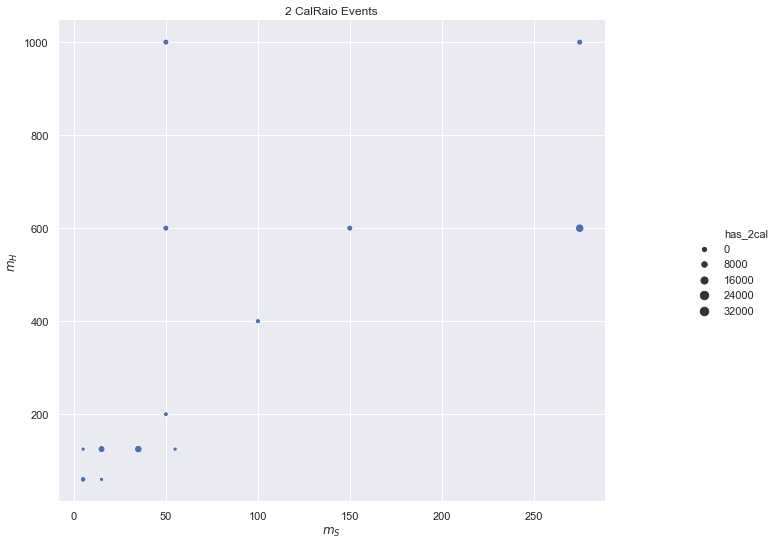

In [8]:
sns.relplot(x="mS", y="mH",
            size="has_2cal",
            data=df_rec)
plt.title('2 CalRaio Events')
plt.ylabel('$m_H$')
plt.xlabel('$m_S$')
fig = plt.gcf()
_ = fig.set_size_inches(12, 8)

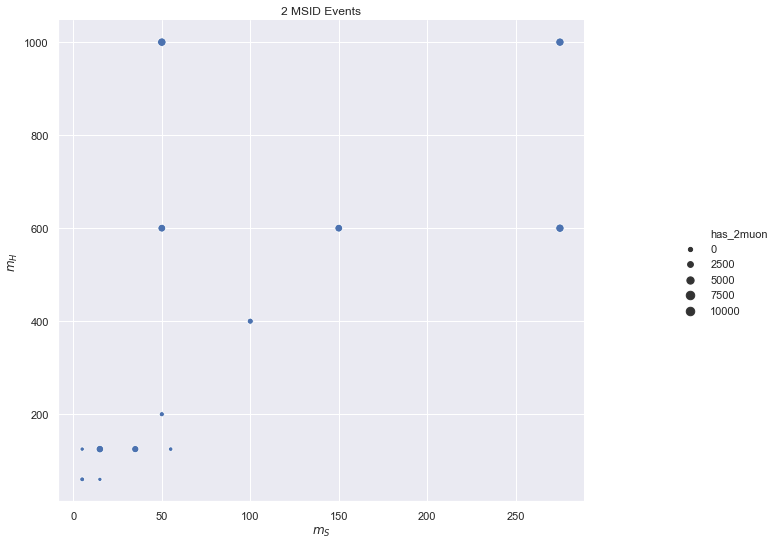

In [9]:
sns.relplot(x="mS", y="mH",
            size="has_2muon",
            data=df_rec)
plt.title('2 MSID Events')
plt.ylabel('$m_H$')
plt.xlabel('$m_S$')
fig = plt.gcf()
_ = fig.set_size_inches(12, 8)

## Conclusion

We need two datasets, a low and high mass, to study the `calms` decays. Use $m_H, m_S=1000, 475$ GeV and $m_H, m_S=1